# TUTORIAL: 
# Low order model of nonlinear thermocaoustic instabilities

In [11]:
import parent_folders # workaround path issue in jupyter notebook

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from essentials.physical_models import Annular
import numpy as np
import mediapy, os


## 1. Define the thermoacoustic low order model

#### Thermoacoustic model


#### Example thermoacoustic modes:
* Spinning modes: nu = 30., c2beta = 5.  
* Standing modes: nu = 1., c2beta = 25.  
* Mixed mode: nu = 20., c2beta = 18.  

In [16]:
case = Annular(nu=20., 
               c2beta=10.)

state, t_ = case.time_integrate(int(case.t_transient * 3 / case.dt))
case.update_history(state, t_)


## 2. Visualize acoustic modes

The state vector is formed of
$$
\psi = [\eta_a; \dot{\eta}_a; \eta_b; \dot{\eta}_b],
$$
where $\eta_a, \eta_b$ are the acoustic velocity modes and $\dot{\eta}_a, \dot{\eta}_b$ are the acoustic pressure modes.


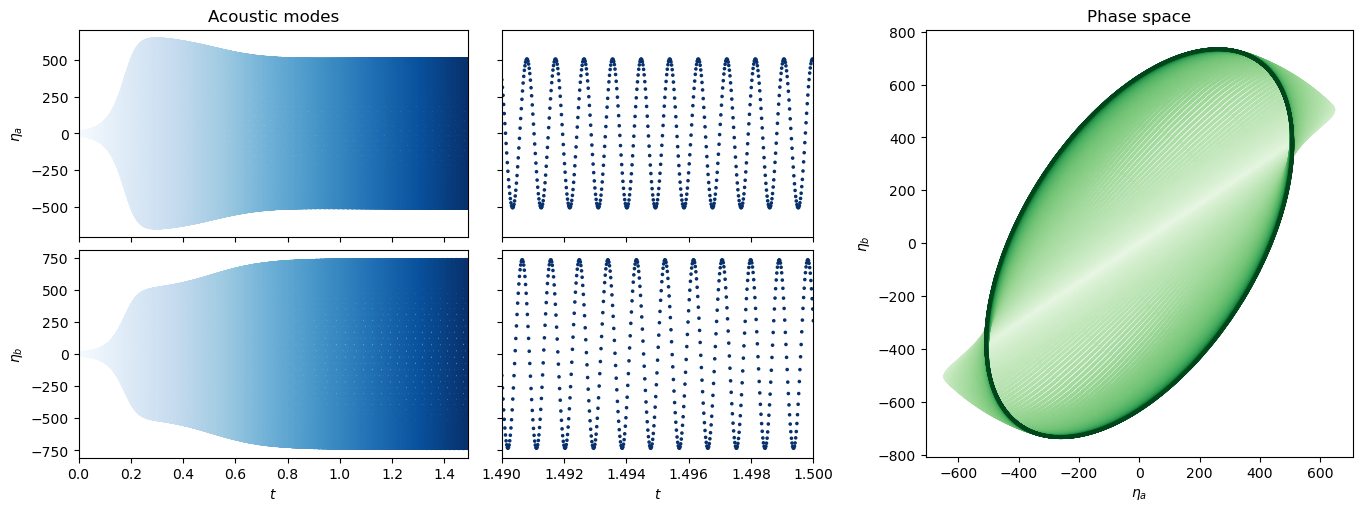

In [17]:
fig1 = plt.figure(figsize=(14, 5), layout="constrained")
sub_fig1 = fig1.subfigures(1, 2, width_ratios=[1.5, 1])
axs = sub_fig1[0].subplots(2, 2, sharex='col', sharey='row', width_ratios=[1, 0.8])
Nt_zoom = int(case.t_CR / case.dt)
xlims = [[case.hist_t[0], case.hist_t[-1]-case.t_CR], [case.hist_t[-1]-case.t_CR, case.hist_t[-1]]]
for axs_, xl, tl in zip([axs[:, 0], axs[:, 1]], xlims, ['Acoustic modes', '']):
    for ii, ax, lbl in zip([0, 2], axs_, ['$\eta_a$', '$\eta_b$']):
        ax.scatter(case.hist_t, case.hist[:, ii], c=case.hist_t, cmap='Blues', s=10, marker='.')
        if xl == xlims[0]:
            ax.set(ylabel=lbl)
    axs_[-1].set(xlabel='$t$', xlim=xl)
    axs_[0].set_title(tl)
ax = sub_fig1[1].subplots(1, 1)
ax.set_title('Phase space')
ax.scatter(case.hist[:, 0], case.hist[:, 2], c=case.hist_t, cmap='Greens', s=10, marker='.')
ax.set(xlabel='$\eta_a$', ylabel='$\eta_b$')
ax.set_aspect(1. / ax.get_data_ratio())


## 3. Visualize acoustic pressure in the annular combustor

The acoustic pressure at an azimuthal angle $\theta$ is computed as 
$$
p(\theta, t) = \eta_a(t) \cos\theta + \eta_b(t) \sin\theta.
$$
The angle $\theta$ is defined such that $\theta=0^\circ$ corresponds to the bottom centre line of the combustor.

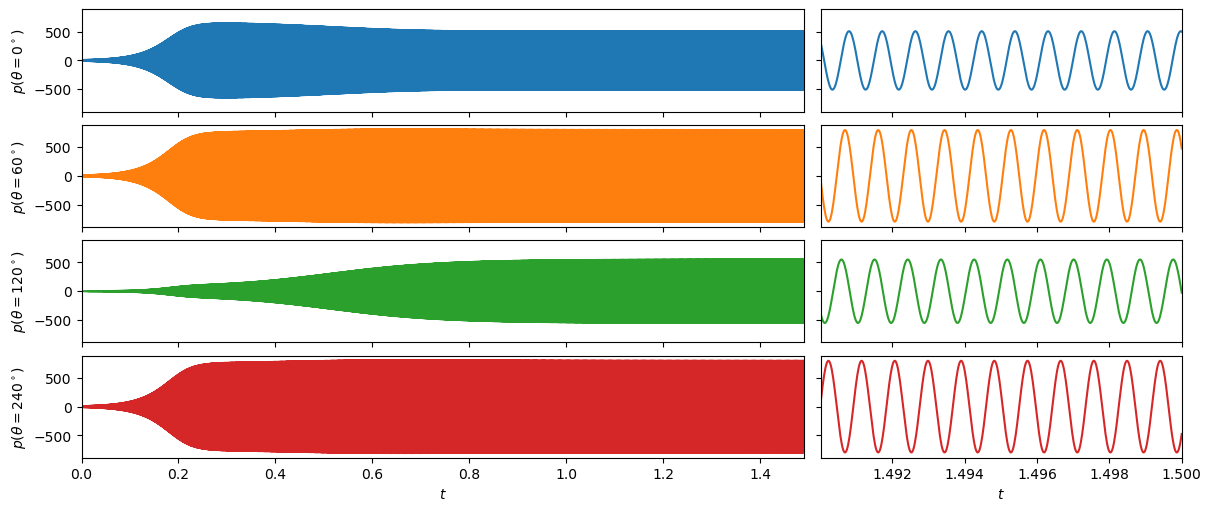

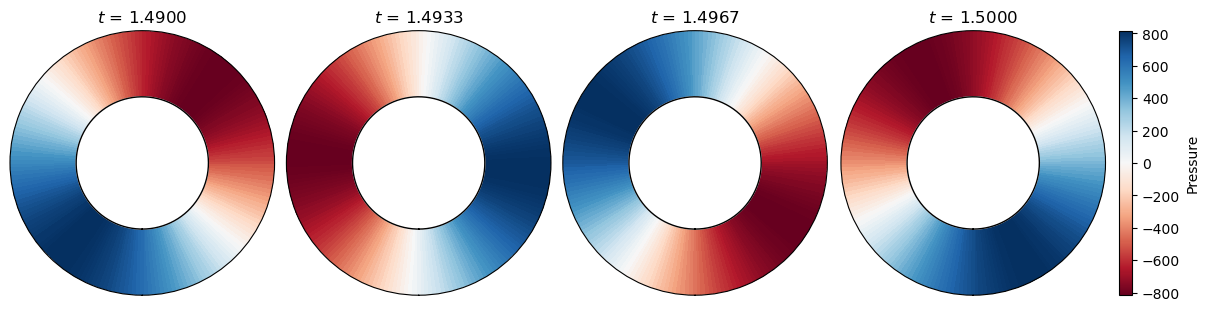

In [18]:


y = case.get_observable_hist()
lbl = case.obs_labels

fig1 = plt.figure(figsize=(12, 5), layout="constrained")
all_axs = fig1.subplots(case.Nq, 2, sharex='col', sharey=True, width_ratios=[2,1])
for axs, xl in zip([all_axs[:, 0], all_axs[:, 1]], [[0, -Nt_zoom], [-Nt_zoom, -1]]):
    for ax, ii, lbl in zip(axs, np.arange(case.Nq), case.obs_labels):
        ax.plot(case.hist_t, y[:, ii], c='C{}'.format(ii))
        if xl[0] == 0:
            ax.set(ylabel=lbl)
    axs[-1].set(xlabel='$t$', xlim=[case.hist_t[xl[0]], case.hist_t[xl[-1]]])
    
    

fig = plt.figure(figsize=(12, 3), layout="constrained")
all_ax2 = fig.subplots(1, 4, subplot_kw={'projection': 'polar'})
angles = np.linspace(0, 2 * np.pi, 200)  # Angles from 0 to 2π
y_all = case.get_observable_hist(loc=angles)
y_all = np.mean(y_all, axis=-1)

radius = [0, 0.5, 1]
theta, r = np.meshgrid(angles, radius)
    
circle_radius = 0.5

for ax2, ti in zip(all_ax2.ravel(), [-Nt_zoom, -Nt_zoom//3*2, -Nt_zoom//3, -1]):
    # Remove radial tick labels
    ax2.set(yticklabels=[], theta_zero_location='S', title='$t$ = {:.4f}'.format(case.hist_t[ti]) ,
            theta_direction=1, rgrids=[], thetagrids=[])
    
    if ti == -1:
        idx_max = np.argmax(y_all[:, 0])
        polar_mesh = ax2.pcolormesh(theta, r, [y_all[idx_max].T] * len(radius), shading='auto', cmap='RdBu')
        plt.colorbar(polar_mesh, label='Pressure')
    
    # Add a white concentric circle
    ax2.pcolormesh(theta, r, [y_all[ti].T] * len(radius), shading='auto', cmap='RdBu')
    ax2.plot(angles, [circle_radius] * len(angles), color='black', lw=1)
    ax2.fill(angles, [circle_radius] * len(angles), color='white')
    
    

    

        

We can also visualize the acoustic pressure in all the combustor as a video.

*Note: the animation requires the "mediapy" module.*

In [19]:
run_gif = False

if run_gif:
    pressure_video_name = 'figs_TA_azimuthal/'
    os.makedirs(pressure_video_name, exist_ok=True)
    pressure_video_name += 'nu{}_c2beta{}.gif'.format(case.nu, case.c2beta)
    
    if not os.path.isfile(pressure_video_name):
        y = case.get_observable_hist()
        lbl = case.obs_labels
        
        fig1 = plt.figure(figsize=(12, 6), layout="constrained")
        sub_fig1 = fig1.subfigures(1, 2, width_ratios=[1., 1])
        axs = sub_fig1[0].subplots(case.Nq, 1, sharex='col', sharey=True)
        for ax, ii, lbl in zip(axs, np.arange(case.Nq), case.obs_labels):
            ax.scatter(case.hist_t, y[:, ii], c='w')
            ax.set(ylabel=lbl)
        axs[-1].set(xlabel='$t$', xlim=[case.hist_t[0], case.hist_t[-1]])
        axs[0].set_title('Acoustic pressure');
        
        ax2 = sub_fig1[1].subplots(1, 1, subplot_kw={'projection': 'polar'})
        angles = np.linspace(0, 2 * np.pi, 200)  # Angles from 0 to 2π
        y_all = case.get_observable_hist(loc=angles)
        y_all = np.mean(y_all, axis=-1)
        
        radius = [0, 0.5, 1]
        theta, r = np.meshgrid(angles, radius)
        
        # Remove radial tick labels
        ax2.set(yticklabels=[], theta_zero_location='S', title='Acoustic Pressure',
                theta_direction=1, rgrids=[], thetagrids=[])
        
        # Add a white concentric circle
        circle_radius = 0.5
        ax2.plot(angles, [circle_radius] * len(angles), color='black', lw=1)
        
        idx_max = np.argmax(y_all[:, 0])
        polar_mesh = ax2.pcolormesh(theta, r, [y_all[idx_max].T] * len(radius), shading='auto', cmap='RdBu')
        
        start_i = int((case.hist_t[-1] - .01) // case.dt)
        dt_gif = 2
        t_gif = case.hist_t[start_i::dt_gif]
        y_gif = y_all[start_i::dt_gif]
        y = y[start_i:]
        t = case.hist_t[start_i:]
        axs[-1].set(xlim=[t_gif[0], t_gif[-1]])
        
        def update(frame):
            i0 = frame * dt_gif
            for ax, ii, lbl in zip(axs, np.arange(case.Nq), case.obs_labels):
                ax.plot(t[i0:i0+dt_gif], y[i0:i0+dt_gif, ii], c='C{}'.format(ii), lw=2)
                ax.set(ylabel=lbl)
            
            ax2.fill(angles, [circle_radius] * len(angles), color='white')
            polar_mesh.set_array([y_gif[frame+1].T] * len(radius))
            ax2.set_title('Acoustic Pressure $t$ = {:.3f}'.format(t_gif[frame+1]))  
        
        plt.colorbar(polar_mesh, label='Pressure', shrink=0.75)
        anim = FuncAnimation(fig1, update,  frames=len(t_gif)-1)
        anim.save(pressure_video_name, fps=15)
        
    # Load and show the video
    video = mediapy.read_video(pressure_video_name)
    mediapy.show_video(video, width=900)